In [8]:
import csv
import cv2
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from random import uniform
from utils import drawLandmarks

%matplotlib inline

In [9]:
if not os.path.exists("./preview"):
	os.makedirs("./preview")

get dataset source videos

In [10]:
dataset = {}
alphabet = [d.path for d in os.scandir("./dataset") if d.is_dir()]

for path in alphabet:
	dataset[os.path.basename(path)] = [f.path for f in os.scandir(path) if f.is_file()]

In [11]:
HandLandmarker = mp.tasks.vision.HandLandmarker

options = mp.tasks.vision.HandLandmarkerOptions(
	base_options=mp.tasks.BaseOptions(model_asset_path="./models/hand_landmarker.task"),
	running_mode=mp.tasks.vision.RunningMode.VIDEO,
	num_hands=2,
)

initialize dataset file

In [12]:
columns = ["letter", "hand"]
for i in range(21):
	columns.append(f"x{i}")
	columns.append(f"y{i}")
	columns.append(f"z{i}")

if os.path.exists("dataset.csv"):
	i = 1
	while os.path.exists(f"dataset.csv.bak{i}"):
		i += 1
	os.rename("dataset.csv", f"dataset.csv.bak{i}")

with open("dataset.csv", "w", newline="") as f:
	writer = csv.writer(f)
	writer.writerow(columns)

generating dataset

In [13]:
for path in dataset:
	for file in dataset[path]:
		if file == "nan":
			continue

		with HandLandmarker.create_from_options(options) as landmarker:
			print(file)
			vid = cv2.VideoCapture(file)

			if not vid.isOpened():
				print(f"Error opening {file}")
				continue

			fps = vid.get(cv2.CAP_PROP_FPS)
			inc = 1000 / fps
			i = 0

			while True:
				ret, frame = vid.read()
				if not ret:
					print(f"Finished {file}")
					break

				mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

				result = landmarker.detect_for_video(mp_img, int(i))
				landmarks_ls = result.hand_world_landmarks
				handedness_ls = result.handedness

				if not landmarks_ls:
					i += inc
					continue

				for idx in range(len(landmarks_ls)):
					landmarks = pd.Series(np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks_ls[idx]]).flatten())
					handedness = handedness_ls[idx][0].index

					with open("dataset.csv", "a", newline="") as f:
						writer = csv.writer(f)
						landmarks = landmarks.tolist()
						writer.writerow([path, handedness] + [landmark + uniform(-0.00005, 0.00005) for landmark in landmarks])

				if i == 0:
					output = drawLandmarks(mp_img.numpy_view(), result)
					cv2.imwrite(f"./preview/{os.path.basename(file)}.jpg", cv2.cvtColor(output, cv2.COLOR_RGB2BGR))

				i += inc

			vid.release()

I0000 00:00:1740757454.944650 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757455.053389 10963321 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757455.077172 10963323 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


./dataset/R/IMG_4864.mp4
Finished ./dataset/R/IMG_4864.mp4
./dataset/R/IMG_4681.mp4


I0000 00:00:1740757474.648310 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757474.675539 10963816 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757474.700587 10963816 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_4681.mp4
./dataset/R/IMG_3945.mp4


I0000 00:00:1740757483.599140 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757483.625874 10964059 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757483.648015 10964060 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_3945.mp4
./dataset/R/IMG_3833.mp4


I0000 00:00:1740757496.807773 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757496.831814 10964196 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757496.853108 10964197 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_3833.mp4
./dataset/R/IMG_3773.mp4


I0000 00:00:1740757512.091598 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757512.116442 10964363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757512.136711 10964363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_3773.mp4
./dataset/R/IMG_3999.mp4


I0000 00:00:1740757531.688544 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757531.715108 10964552 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757531.736816 10964553 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_3999.mp4
./dataset/R/IMG_5557.mp4


I0000 00:00:1740757553.304695 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757553.330286 10964826 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757553.351020 10964826 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_5557.mp4
./dataset/R/IMG_4890.mp4


I0000 00:00:1740757567.530978 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757567.555514 10964943 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757567.575568 10964944 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/R/IMG_4890.mp4
./dataset/U/IMG_4867.mp4


I0000 00:00:1740757588.322085 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757588.346399 10965163 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757588.367234 10965164 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_4867.mp4
./dataset/U/IMG_5560.mp4


I0000 00:00:1740757602.070710 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757602.094955 10965272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757602.115181 10965272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_5560.mp4
./dataset/U/IMG_4684.mp4


I0000 00:00:1740757618.033518 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757618.058844 10965428 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757618.079464 10965429 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_4684.mp4
./dataset/U/IMG_3776.mp4


I0000 00:00:1740757625.780924 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757625.805033 10965492 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757625.825275 10965495 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_3776.mp4
./dataset/U/IMG_3836.mp4


I0000 00:00:1740757646.260417 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757646.286512 10965663 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757646.306081 10965664 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_3836.mp4
./dataset/U/IMG_4003.mp4


I0000 00:00:1740757659.950879 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757659.974913 10965800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757659.995160 10965802 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_4003.mp4
./dataset/U/IMG_4893.mp4


I0000 00:00:1740757680.573545 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757680.598873 10965977 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757680.618228 10965977 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/U/IMG_4893.mp4
./dataset/I/IMG_5549.mp4


I0000 00:00:1740757697.717269 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757697.742253 10966124 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757697.760834 10966125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_5549.mp4
./dataset/I/IMG_3763.mp4


I0000 00:00:1740757715.079182 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757715.104101 10966571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757715.123962 10966571 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_3763.mp4
./dataset/I/IMG_3991.mp4


I0000 00:00:1740757736.670186 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757736.693617 10966939 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757736.712209 10966939 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_3991.mp4
./dataset/I/IMG_3823.mp4


I0000 00:00:1740757751.506248 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757751.529821 10967117 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757751.547881 10967119 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_3823.mp4
./dataset/I/IMG_4701.mp4


I0000 00:00:1740757765.166290 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757765.189300 10967296 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757765.207812 10967296 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_4701.mp4
./dataset/I/IMG_4880.mp4


I0000 00:00:1740757771.940657 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757771.964357 10967342 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757771.982865 10967340 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_4880.mp4
./dataset/I/IMG_3889.mp4


I0000 00:00:1740757789.120699 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757789.144353 10967574 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757789.163369 10967573 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_3889.mp4
./dataset/I/IMG_4670.mp4


I0000 00:00:1740757803.256894 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757803.282146 10967704 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757803.300932 10967704 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_4670.mp4
./dataset/I/IMG_4856.mp4


I0000 00:00:1740757810.550962 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757810.574655 10967789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757810.593281 10967787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/I/IMG_4856.mp4
./dataset/N/IMG_4860.mp4


I0000 00:00:1740757822.599408 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757822.623675 10967891 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757822.642654 10967891 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_4860.mp4
./dataset/N/IMG_3995.mp4


I0000 00:00:1740757836.727578 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757836.751328 10968031 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757836.770918 10968033 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_3995.mp4
./dataset/N/IMG_3941.mp4


I0000 00:00:1740757851.897167 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757851.921318 10968203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757851.940052 10968203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_3941.mp4
./dataset/N/IMG_3769.mp4


I0000 00:00:1740757866.347659 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757866.371290 10968332 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757866.390494 10968331 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_3769.mp4
./dataset/N/IMG_3828.mp4


I0000 00:00:1740757884.673416 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757884.698230 10968494 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757884.718325 10968494 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_3828.mp4
./dataset/N/IMG_4885.mp4


I0000 00:00:1740757896.922185 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757896.945762 10968611 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757896.965651 10968611 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_4885.mp4
./dataset/N/IMG_4676.mp4


I0000 00:00:1740757914.806106 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757914.830400 10968809 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757914.849001 10968809 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_4676.mp4
./dataset/N/IMG_4705.mp4


I0000 00:00:1740757922.237747 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757922.261367 10968904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757922.280856 10968904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_4705.mp4
./dataset/N/IMG_5553.mp4


I0000 00:00:1740757928.824320 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757928.848374 10968976 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757928.867451 10968975 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/N/IMG_5553.mp4
./dataset/G/IMG_5576.mp4


I0000 00:00:1740757945.419035 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757945.442534 10969118 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757945.461540 10969117 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_5576.mp4
./dataset/G/IMG_3887.mp4


I0000 00:00:1740757962.275297 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757962.299374 10969276 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757962.319106 10969278 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_3887.mp4
./dataset/G/IMG_3761.mp4


I0000 00:00:1740757975.998647 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757976.023158 10969429 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757976.042749 10969429 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_3761.mp4
./dataset/G/IMG_3821.mp4


I0000 00:00:1740757999.134972 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740757999.159594 10969655 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740757999.178934 10969655 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_3821.mp4
./dataset/G/IMG_3989.mp4


I0000 00:00:1740758011.796808 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758011.822111 10969781 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758011.841457 10969782 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_3989.mp4
./dataset/G/IMG_4878.mp4


I0000 00:00:1740758026.671842 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758026.696666 10969904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758026.716631 10969902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_4878.mp4
./dataset/G/IMG_4667.mp4


I0000 00:00:1740758043.777702 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758043.801250 10970123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758043.821772 10970121 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_4667.mp4
./dataset/G/IMG_4698.mp4


I0000 00:00:1740758051.735672 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758051.759945 10970212 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758051.778913 10970215 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_4698.mp4
./dataset/G/IMG_4854.mp4


I0000 00:00:1740758059.190271 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758059.214613 10970307 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758059.234683 10970309 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_4854.mp4
./dataset/G/IMG_5584.mp4


I0000 00:00:1740758071.870921 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758071.895384 10970453 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758071.915272 10970453 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_5584.mp4
./dataset/G/IMG_5547.mp4


I0000 00:00:1740758081.953074 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758081.977087 10970596 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758081.996228 10970593 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/G/IMG_5547.mp4
./dataset/T/IMG_4683.mp4


I0000 00:00:1740758098.515720 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758098.542841 10970858 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758098.563233 10970860 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_4683.mp4
./dataset/T/IMG_4866.mp4


I0000 00:00:1740758106.828887 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758106.852287 10970914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758106.871500 10970914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_4866.mp4
./dataset/T/IMG_5559.mp4


I0000 00:00:1740758119.632387 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758119.656384 10971063 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758119.675220 10971063 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_5559.mp4
./dataset/T/IMG_3775.mp4


I0000 00:00:1740758139.077848 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758139.102665 10971242 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758139.122896 10971243 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_3775.mp4
./dataset/T/IMG_3947.mp4


I0000 00:00:1740758159.086845 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758159.111198 10971436 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758159.130529 10971437 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_3947.mp4
./dataset/T/IMG_3835.mp4


I0000 00:00:1740758174.113954 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758174.137385 10971669 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758174.156123 10971670 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_3835.mp4
./dataset/T/IMG_4002.mp4


I0000 00:00:1740758189.621108 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758189.645446 10971832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758189.665639 10971833 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_4002.mp4
./dataset/T/IMG_4892.mp4


I0000 00:00:1740758209.641194 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758209.665646 10972019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758209.685267 10972018 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/T/IMG_4892.mp4
./dataset/S/IMG_4682.mp4


I0000 00:00:1740758226.505205 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758226.530672 10972178 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758226.549958 10972177 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_4682.mp4
./dataset/S/IMG_4865.mp4


I0000 00:00:1740758233.735537 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758233.759516 10972268 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758233.778995 10972270 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_4865.mp4
./dataset/S/IMG_5558.mp4


I0000 00:00:1740758246.695102 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758246.720879 10972391 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758246.740369 10972391 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_5558.mp4
./dataset/S/IMG_3946.mp4


I0000 00:00:1740758262.341883 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758262.365982 10972521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758262.385051 10972521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_3946.mp4
./dataset/S/IMG_3774.mp4


I0000 00:00:1740758276.221753 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758276.245832 10972652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758276.264342 10972654 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_3774.mp4
./dataset/S/IMG_3834.mp4


I0000 00:00:1740758307.881181 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758307.920852 10974005 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758307.945851 10974005 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_3834.mp4
./dataset/S/IMG_4001.mp4


I0000 00:00:1740758332.225733 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758332.258058 10974546 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758332.281076 10974548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_4001.mp4
./dataset/S/IMG_4891.mp4


I0000 00:00:1740758353.904339 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758353.939117 10975016 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758353.964992 10975016 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/S/IMG_4891.mp4
./dataset/A/IMG_4873.mp4


I0000 00:00:1740758371.736800 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758371.766762 10975188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758371.788185 10975189 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_4873.mp4
./dataset/A/IMG_4872.mp4


I0000 00:00:1740758394.571240 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758394.598071 10975599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758394.625008 10975599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_4872.mp4
./dataset/A/IMG_4848.mp4


I0000 00:00:1740758416.135284 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758416.160704 10975926 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758416.181203 10975926 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_4848.mp4
./dataset/A/IMG_3881.mp4


I0000 00:00:1740758430.252200 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758430.280219 10976083 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758430.301219 10976084 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3881.mp4
./dataset/A/IMG_3982.mp4


I0000 00:00:1740758447.167920 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758447.193656 10976339 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758447.214321 10976339 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3982.mp4
./dataset/A/IMG_3811.mp4


I0000 00:00:1740758461.905571 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758461.931529 10976512 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758461.952755 10976513 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3811.mp4
./dataset/A/IMG_3754.mp4


I0000 00:00:1740758472.584159 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758472.611834 10976634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758472.633879 10976634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3754.mp4
./dataset/A/IMG_3752.mp4


I0000 00:00:1740758487.768839 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758487.794419 10976849 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758487.814895 10976850 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3752.mp4
./dataset/A/IMG_3753.mp4


I0000 00:00:1740758502.898137 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758502.926267 10977220 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758502.946978 10977219 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_3753.mp4
./dataset/A/IMG_4689.mp4


I0000 00:00:1740758523.467153 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758523.491052 10977415 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758523.511671 10977415 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_4689.mp4
./dataset/A/IMG_5541.mp4


I0000 00:00:1740758529.868769 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758529.894295 10977485 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758529.913823 10977484 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_5541.mp4
./dataset/A/IMG_4658.mp4


I0000 00:00:1740758547.760075 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758547.783852 10977639 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758547.804621 10977642 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/A/IMG_4658.mp4
./dataset/F/IMG_3886.mp4


I0000 00:00:1740758555.803127 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758555.827812 10977723 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758555.846016 10977723 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_3886.mp4
./dataset/F/IMG_4695.mp4


I0000 00:00:1740758570.057600 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758570.083772 10977853 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758570.104936 10977853 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_4695.mp4
./dataset/F/IMG_4877.mp4


I0000 00:00:1740758579.564818 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758579.588377 10977932 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758579.608264 10977931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_4877.mp4
./dataset/F/IMG_3760.mp4


I0000 00:00:1740758600.240280 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758600.265073 10978173 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758600.285867 10978173 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_3760.mp4
./dataset/F/IMG_3820.mp4


I0000 00:00:1740758623.571820 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758623.600642 10978368 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758623.621076 10978369 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_3820.mp4
./dataset/F/IMG_3988.mp4


I0000 00:00:1740758633.988343 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758634.014413 10978461 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758634.035392 10978461 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_3988.mp4
./dataset/F/IMG_4853.mp4


I0000 00:00:1740758656.973081 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758656.999213 10978738 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758657.019371 10978741 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_4853.mp4
./dataset/F/IMG_4666.mp4


I0000 00:00:1740758669.160390 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758669.185264 10978901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758669.205427 10978903 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_4666.mp4
./dataset/F/IMG_5546.mp4


I0000 00:00:1740758677.229444 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758677.254340 10978983 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758677.273627 10978981 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/F/IMG_5546.mp4
./dataset/O/IMG_4861.mp4


I0000 00:00:1740758696.321374 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758696.345411 10979162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758696.365651 10979162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_4861.mp4
./dataset/O/IMG_3830.mp4


I0000 00:00:1740758711.477555 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758711.502293 10979312 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758711.522427 10979311 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_3830.mp4
./dataset/O/IMG_3770.mp4


I0000 00:00:1740758725.544752 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758725.569057 10979457 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758725.590059 10979457 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_3770.mp4
./dataset/O/IMG_3942.mp4


I0000 00:00:1740758744.331301 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758744.356566 10979637 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758744.375464 10979637 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_3942.mp4
./dataset/O/IMG_3996.mp4


I0000 00:00:1740758758.311307 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758758.335096 10979782 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758758.355171 10979785 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_3996.mp4
./dataset/O/IMG_3829.mp4


I0000 00:00:1740758774.618121 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758774.643076 10979920 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758774.662896 10979921 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_3829.mp4
./dataset/O/IMG_5580.mp4


I0000 00:00:1740758783.461561 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758783.486105 10980012 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758783.506361 10980012 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_5580.mp4
./dataset/O/IMG_4886.mp4


I0000 00:00:1740758800.032956 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758800.057319 10980167 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758800.076557 10980167 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_4886.mp4
./dataset/O/IMG_5554.mp4


I0000 00:00:1740758816.937754 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758816.962173 10980364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758816.981663 10980362 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_5554.mp4
./dataset/O/IMG_4677.mp4


I0000 00:00:1740758829.701030 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758829.725820 10980517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758829.744279 10980517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_4677.mp4
./dataset/O/IMG_5586.mp4


I0000 00:00:1740758837.477096 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758837.503166 10980602 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758837.523381 10980601 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_5586.mp4
./dataset/O/IMG_4706.mp4


I0000 00:00:1740758850.000849 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758850.025427 10980771 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758850.044995 10980771 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/O/IMG_4706.mp4
./dataset/#/IMG_5571.mp4


I0000 00:00:1740758860.019204 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758860.042904 10980857 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758860.062643 10980855 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/#/IMG_5571.mp4
./dataset/H/IMG_4669.mp4


I0000 00:00:1740758871.887654 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758871.913062 10980955 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758871.933014 10980954 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_4669.mp4
./dataset/H/IMG_5548.mp4


I0000 00:00:1740758879.342974 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758879.367588 10981047 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758879.386874 10981047 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_5548.mp4
./dataset/H/.DS_Store
Error opening ./dataset/H/.DS_Store


I0000 00:00:1740758899.339467 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758899.364584 10981239 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758899.385041 10981239 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
OpenCV: Couldn't read video stream from file "./dataset/H/.DS_Store"
I0000 00:00:1740758899.509168 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758899.534832 10981246 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758899.555129 10981244 inference_feedback_manager.cc:114] Feedback manager requires a 

./dataset/H/IMG_3762.mp4
Finished ./dataset/H/IMG_3762.mp4
./dataset/H/IMG_3990.mp4


I0000 00:00:1740758921.666116 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758921.691792 10981534 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758921.712222 10981532 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_3990.mp4
./dataset/H/IMG_3822.mp4


I0000 00:00:1740758944.053747 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758944.077805 10981726 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758944.097753 10981726 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_3822.mp4
./dataset/H/IMG_4700.mp4


I0000 00:00:1740758961.038226 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758961.066877 10981989 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758961.090079 10981989 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_4700.mp4
./dataset/H/IMG_4879.mp4


I0000 00:00:1740758971.063187 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758971.087773 10982070 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758971.107876 10982071 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_4879.mp4
./dataset/H/IMG_4855.mp4


I0000 00:00:1740758991.991578 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740758992.017448 10982275 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740758992.037704 10982276 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_4855.mp4
./dataset/H/IMG_5591.mp4


I0000 00:00:1740759009.986368 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759010.011293 10982488 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759010.031344 10982488 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_5591.mp4
./dataset/H/IMG_5585.mp4


I0000 00:00:1740759023.768797 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759023.793763 10982599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759023.813135 10982599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_5585.mp4
./dataset/H/IMG_3888.mp4


I0000 00:00:1740759037.280230 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759037.304804 10982697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759037.323537 10982697 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/H/IMG_3888.mp4
./dataset/M/IMG_3892.mp4


I0000 00:00:1740759051.553028 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759051.577605 10982852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759051.597473 10982852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_3892.mp4
./dataset/M/IMG_4859.mp4


I0000 00:00:1740759067.555615 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759067.579537 10983074 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759067.599722 10983076 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_4859.mp4
./dataset/M/IMG_3826.mp4


I0000 00:00:1740759081.629424 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759081.654431 10983228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759081.673974 10983228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_3826.mp4
./dataset/M/IMG_3827.mp4


I0000 00:00:1740759096.681543 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759096.706196 10983373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759096.725769 10983373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_3827.mp4
./dataset/M/IMG_3994.mp4


I0000 00:00:1740759109.656286 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759109.681265 10983502 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759109.701931 10983503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_3994.mp4
./dataset/M/IMG_3768.mp4


I0000 00:00:1740759129.349911 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759129.375040 10983660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759129.395458 10983661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_3768.mp4
./dataset/M/IMG_4675.mp4


I0000 00:00:1740759151.714088 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759151.739210 10983869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759151.759092 10983869 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_4675.mp4
./dataset/M/IMG_4884.mp4


I0000 00:00:1740759159.909312 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759159.933831 10984073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759159.954069 10984073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_4884.mp4
./dataset/M/IMG_5552.mp4


I0000 00:00:1740759180.315493 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759180.341630 10984389 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759180.362407 10984389 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_5552.mp4
./dataset/M/IMG_4704.mp4


I0000 00:00:1740759202.396846 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759202.420981 10984661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759202.440914 10984661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/M/IMG_4704.mp4
./dataset/C/IMG_3883.mp4


I0000 00:00:1740759210.010807 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759210.035915 10984799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759210.056660 10984800 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_3883.mp4
./dataset/C/IMG_4874.mp4


I0000 00:00:1740759225.934742 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759225.960393 10985151 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759225.981674 10985151 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_4874.mp4
./dataset/C/IMG_4692.mp4


I0000 00:00:1740759244.042510 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759244.069991 10985626 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759244.090077 10985627 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_4692.mp4
./dataset/C/IMG_3979.mp4


I0000 00:00:1740759251.012863 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759251.041239 10985731 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759251.063154 10985730 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_3979.mp4
./dataset/C/IMG_3984.mp4


I0000 00:00:1740759266.742013 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759266.769798 10986214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759266.790239 10986214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_3984.mp4
./dataset/C/IMG_3757.mp4


I0000 00:00:1740759281.209651 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759281.232785 10986713 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759281.251960 10986716 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_3757.mp4
./dataset/C/IMG_3816.mp4


I0000 00:00:1740759298.624820 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759298.648481 10986907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759298.667392 10986905 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_3816.mp4
./dataset/C/IMG_4661.mp4


I0000 00:00:1740759309.983255 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759310.006530 10987036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759310.025468 10987036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_4661.mp4
./dataset/C/IMG_5543.mp4


I0000 00:00:1740759316.501431 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759316.525239 10987106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759316.543527 10987107 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_5543.mp4
./dataset/C/IMG_4850.mp4


I0000 00:00:1740759339.801978 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759339.824963 10987324 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759339.843823 10987321 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/C/IMG_4850.mp4
./dataset/D/IMG_3884.mp4


I0000 00:00:1740759354.087753 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759354.111497 10987449 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759354.130232 10987449 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_3884.mp4
./dataset/D/IMG_4875.mp4


I0000 00:00:1740759367.915151 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759367.938607 10987572 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759367.957568 10987573 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_4875.mp4
./dataset/D/IMG_4693.mp4


I0000 00:00:1740759382.956216 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759382.979843 10987709 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759382.998380 10987710 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_4693.mp4
./dataset/D/IMG_3818.mp4


I0000 00:00:1740759389.876861 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759389.900868 10987790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759389.920112 10987791 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_3818.mp4
./dataset/D/IMG_3985.mp4


I0000 00:00:1740759401.965498 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759401.989084 10987891 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759402.008064 10987892 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_3985.mp4
./dataset/D/IMG_3980.mp4


I0000 00:00:1740759418.514464 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759418.539879 10988340 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759418.560304 10988341 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_3980.mp4
./dataset/D/IMG_3758.mp4


I0000 00:00:1740759433.199226 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759433.224392 10988509 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759433.243372 10988509 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_3758.mp4
./dataset/D/IMG_4851.mp4


I0000 00:00:1740759455.475910 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759455.499186 10988829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759455.518061 10988829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_4851.mp4
./dataset/D/IMG_4663.mp4


I0000 00:00:1740759471.728007 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759471.752479 10989270 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759471.772024 10989269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_4663.mp4
./dataset/D/IMG_5544.mp4


I0000 00:00:1740759478.829069 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759478.852590 10989364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759478.871885 10989362 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/D/IMG_5544.mp4
./dataset/V/IMG_5561.mp4


I0000 00:00:1740759495.800757 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759495.824835 10989612 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759495.843506 10989614 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_5561.mp4
./dataset/V/IMG_4685.mp4


I0000 00:00:1740759510.777599 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759510.804582 10990163 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759510.826208 10990163 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_4685.mp4
./dataset/V/IMG_3777.mp4


I0000 00:00:1740759519.060155 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759519.084357 10990550 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759519.102897 10990548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_3777.mp4
./dataset/V/IMG_3837.mp4


I0000 00:00:1740759541.418798 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759541.444850 10991248 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759541.466415 10991248 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_3837.mp4
./dataset/V/IMG_4004.mp4


I0000 00:00:1740759556.419819 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759556.446235 10991468 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759556.466056 10991471 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_4004.mp4
./dataset/V/IMG_3948.mp4


I0000 00:00:1740759573.199471 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759573.222771 10991700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759573.241497 10991698 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_3948.mp4
./dataset/V/IMG_4868.mp4


I0000 00:00:1740759587.006141 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759587.029905 10991877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759587.048443 10991880 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_4868.mp4
./dataset/V/IMG_4894.mp4


I0000 00:00:1740759598.637239 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759598.661640 10992111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759598.680611 10992112 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/V/IMG_4894.mp4
./dataset/Q/IMG_5589.mp4


I0000 00:00:1740759615.938359 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759615.962112 10992281 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759615.980710 10992283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_5589.mp4
./dataset/Q/IMG_4680.mp4


I0000 00:00:1740759624.143667 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759624.166815 10992390 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759624.185934 10992390 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_4680.mp4
./dataset/Q/.DS_Store
Error opening ./dataset/Q/.DS_Store
./dataset/Q/IMG_4889.mp4


I0000 00:00:1740759630.843015 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759630.866644 10992481 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759630.885740 10992481 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
OpenCV: Couldn't read video stream from file "./dataset/Q/.DS_Store"
I0000 00:00:1740759630.902455 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759630.925661 10992490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759630.944046 10992491 inference_feedback_manager.cc:114] Feedback manager requires a 

Finished ./dataset/Q/IMG_4889.mp4
./dataset/Q/IMG_4863.mp4


I0000 00:00:1740759649.482435 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759649.506119 10992686 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759649.524631 10992686 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_4863.mp4
./dataset/Q/IMG_3944.mp4


I0000 00:00:1740759662.403982 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759662.427302 10992787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759662.446019 10992786 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_3944.mp4
./dataset/Q/IMG_3832.mp4


I0000 00:00:1740759676.074576 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759676.098045 10992914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759676.116404 10992914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_3832.mp4
./dataset/Q/IMG_3772.mp4


I0000 00:00:1740759690.063721 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759690.086891 10993071 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759690.105667 10993073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_3772.mp4
./dataset/Q/IMG_3998.mp4


I0000 00:00:1740759706.353600 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759706.377604 10993227 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759706.395798 10993227 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_3998.mp4
./dataset/Q/IMG_5556.mp4


I0000 00:00:1740759723.574193 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759723.597850 10993401 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759723.617157 10993400 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_5556.mp4
./dataset/Q/IMG_5596.mp4


I0000 00:00:1740759738.163037 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759738.186985 10993548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759738.205335 10993549 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Q/IMG_5596.mp4
./dataset/X/IMG_5563.mp4


I0000 00:00:1740759749.790091 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759749.813720 10993665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759749.832463 10993664 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_5563.mp4
./dataset/X/IMG_4870.mp4


I0000 00:00:1740759766.867953 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759766.892943 10993956 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759766.911917 10993955 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_4870.mp4
./dataset/X/IMG_4687.mp4


I0000 00:00:1740759778.197712 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759778.221394 10994141 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759778.239862 10994139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_4687.mp4
./dataset/X/IMG_3950.mp4


I0000 00:00:1740759784.772757 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759784.796509 10994184 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759784.815090 10994184 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_3950.mp4
./dataset/X/IMG_3839.mp4


I0000 00:00:1740759798.141797 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759798.165055 10994317 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759798.184013 10994317 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_3839.mp4
./dataset/X/IMG_4006.mp4


I0000 00:00:1740759812.237733 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759812.261718 10994441 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759812.280062 10994439 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_4006.mp4
./dataset/X/IMG_3779.mp4


I0000 00:00:1740759828.679365 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759828.702450 10994614 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759828.721085 10994614 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_3779.mp4
./dataset/X/IMG_5583.mp4


I0000 00:00:1740759845.881794 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759845.905298 10994752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759845.923540 10994752 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_5583.mp4
./dataset/X/IMG_4896.mp4


I0000 00:00:1740759858.741921 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759858.765311 10994894 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759858.783857 10994892 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_4896.mp4
./dataset/X/IMG_5590.mp4


I0000 00:00:1740759877.433005 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759877.456716 10995094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759877.475685 10995093 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/X/IMG_5590.mp4
./dataset/E/IMG_3885.mp4


I0000 00:00:1740759888.066338 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759888.090330 10995205 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759888.109230 10995206 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_3885.mp4
./dataset/E/IMG_4694.mp4


I0000 00:00:1740759910.863034 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759910.886711 10995411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759910.904718 10995411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_4694.mp4
./dataset/E/IMG_4876.mp4


I0000 00:00:1740759918.404933 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759918.428951 10995463 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759918.448012 10995464 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_4876.mp4
./dataset/E/IMG_3819.mp4


I0000 00:00:1740759934.328939 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759934.352616 10995680 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759934.371057 10995679 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_3819.mp4
./dataset/E/IMG_3987.mp4


I0000 00:00:1740759946.291896 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759946.316252 10995902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759946.335245 10995902 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_3987.mp4
./dataset/E/IMG_3759.mp4


I0000 00:00:1740759962.433407 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759962.456920 10996059 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759962.475219 10996058 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_3759.mp4
./dataset/E/IMG_3981.mp4


I0000 00:00:1740759982.751931 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759982.775211 10996241 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759982.793704 10996243 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_3981.mp4
./dataset/E/IMG_4852.mp4


I0000 00:00:1740759996.114468 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740759996.138182 10996363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740759996.156309 10996363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_4852.mp4
./dataset/E/IMG_5545.mp4


I0000 00:00:1740760008.195067 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760008.218249 10996468 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760008.237457 10996467 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_5545.mp4
./dataset/E/IMG_4665.mp4


I0000 00:00:1740760022.957609 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760022.981540 10996630 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760023.000073 10996630 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/E/IMG_4665.mp4
./dataset/B/IMG_4691.mp4


I0000 00:00:1740760029.465076 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760029.488864 10996708 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760029.507802 10996708 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_4691.mp4
./dataset/B/IMG_4849.mp4


I0000 00:00:1740760034.162156 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760034.185838 10996746 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760034.204373 10996745 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_4849.mp4
./dataset/B/.DS_Store
Error opening ./dataset/B/.DS_Store
./dataset/B/IMG_3882.mp4


I0000 00:00:1740760046.713357 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760046.736339 10996846 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760046.754739 10996845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
OpenCV: Couldn't read video stream from file "./dataset/B/.DS_Store"
I0000 00:00:1740760046.772475 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760046.796812 10996854 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760046.814579 10996853 inference_feedback_manager.cc:114] Feedback manager requires a 

Finished ./dataset/B/IMG_3882.mp4
./dataset/B/IMG_3978.mp4


I0000 00:00:1740760063.555689 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760063.579123 10997021 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760063.597759 10997020 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3978.mp4
./dataset/B/IMG_3983.mp4


I0000 00:00:1740760076.327810 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760076.351700 10997129 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760076.370078 10997128 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3983.mp4
./dataset/B/IMG_3756.mp4


I0000 00:00:1740760089.661730 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760089.684879 10997263 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760089.703372 10997263 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3756.mp4
./dataset/B/IMG_3755.mp4


I0000 00:00:1740760102.203768 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760102.227527 10997394 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760102.245960 10997392 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3755.mp4
./dataset/B/IMG_3812.mp4


I0000 00:00:1740760114.490626 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760114.514156 10997497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760114.532575 10997497 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3812.mp4
./dataset/B/IMG_3815.mp4


I0000 00:00:1740760123.660348 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760123.684109 10997586 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760123.702248 10997586 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3815.mp4
./dataset/B/IMG_3814.mp4


I0000 00:00:1740760132.813263 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760132.837036 10997679 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760132.855878 10997679 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_3814.mp4
./dataset/B/IMG_5542.mp4


I0000 00:00:1740760139.306728 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760139.330275 10997753 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760139.348655 10997753 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_5542.mp4
./dataset/B/IMG_4659.mp4


I0000 00:00:1740760152.643150 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760152.666392 10997863 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760152.685484 10997864 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/B/IMG_4659.mp4
./dataset/K/IMG_3890.mp4


I0000 00:00:1740760159.435318 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760159.458943 10997942 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760159.477180 10997942 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_3890.mp4
./dataset/K/IMG_3992.mp4


I0000 00:00:1740760171.588250 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760171.611701 10998047 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760171.630045 10998047 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_3992.mp4
./dataset/K/IMG_3824.mp4


I0000 00:00:1740760185.244321 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760185.267979 10998179 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760185.286046 10998177 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_3824.mp4
./dataset/K/IMG_3764.mp4


I0000 00:00:1740760197.585830 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760197.609248 10998274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760197.627916 10998274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_3764.mp4
./dataset/K/IMG_4702.mp4


I0000 00:00:1740760219.796871 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760219.820426 10998493 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760219.838828 10998493 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_4702.mp4
./dataset/K/IMG_4673.mp4


I0000 00:00:1740760226.466439 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760226.489495 10998542 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760226.508600 10998544 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_4673.mp4
./dataset/K/IMG_5550.mp4


I0000 00:00:1740760233.016230 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760233.039753 10998614 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760233.058026 10998612 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_5550.mp4
./dataset/K/IMG_4857.mp4


I0000 00:00:1740760252.108259 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760252.132173 10998858 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760252.151402 10998858 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_4857.mp4
./dataset/K/IMG_4881.mp4


I0000 00:00:1740760265.601201 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760265.624951 10998979 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760265.643280 10998981 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/K/IMG_4881.mp4
./dataset/L/IMG_3891.mp4


I0000 00:00:1740760280.255049 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760280.279070 10999188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760280.297887 10999191 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_3891.mp4
./dataset/L/IMG_4858.mp4


I0000 00:00:1740760293.751697 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760293.776457 10999316 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760293.796088 10999316 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_4858.mp4
./dataset/L/IMG_3825.mp4


I0000 00:00:1740760306.631942 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760306.656367 10999441 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760306.676356 10999441 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_3825.mp4
./dataset/L/IMG_3993.mp4


I0000 00:00:1740760319.577470 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760319.601548 10999598 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760319.620741 10999599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_3993.mp4
./dataset/L/IMG_3767.mp4


I0000 00:00:1740760335.292525 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760335.317044 10999733 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760335.337402 10999732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_3767.mp4
./dataset/L/IMG_4674.mp4


I0000 00:00:1740760352.898113 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760352.922948 10999907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760352.942705 10999908 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_4674.mp4
./dataset/L/IMG_4703.mp4


I0000 00:00:1740760360.038611 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760360.062224 10999988 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760360.081438 10999990 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_4703.mp4
./dataset/L/IMG_4883.mp4


I0000 00:00:1740760367.101783 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760367.126291 11000030 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760367.145908 11000031 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_4883.mp4
./dataset/L/IMG_5551.mp4


I0000 00:00:1740760384.440644 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760384.464713 11000221 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760384.484871 11000221 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/L/IMG_5551.mp4
./dataset/Y/IMG_4871.mp4


I0000 00:00:1740760400.175689 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760400.199997 11000373 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760400.218467 11000375 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_4871.mp4
./dataset/Y/IMG_5564.mp4


I0000 00:00:1740760413.244727 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760413.268505 11000485 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760413.287823 11000485 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_5564.mp4
./dataset/Y/IMG_3840.mp4


I0000 00:00:1740760427.257768 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760427.282560 11000610 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760427.300961 11000611 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_3840.mp4
./dataset/Y/IMG_3951.mp4


I0000 00:00:1740760440.605553 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760440.629613 11000759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760440.648565 11000759 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_3951.mp4
./dataset/Y/IMG_4009.mp4


I0000 00:00:1740760455.360212 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760455.385302 11000900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760455.403931 11000901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_4009.mp4
./dataset/Y/IMG_3780.mp4


I0000 00:00:1740760470.277422 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760470.301926 11001056 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760470.321451 11001056 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_3780.mp4
./dataset/Y/IMG_4688.mp4


I0000 00:00:1740760490.344169 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760490.368896 11001318 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760490.387727 11001318 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_4688.mp4
./dataset/Y/IMG_4897.mp4


I0000 00:00:1740760497.101265 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760497.126089 11001380 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760497.147177 11001381 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/Y/IMG_4897.mp4
./dataset/P/.DS_Store
Error opening ./dataset/P/.DS_Store
./dataset/P/IMG_4679.mp4


I0000 00:00:1740760516.127100 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760516.151489 11001600 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760516.170507 11001600 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
OpenCV: Couldn't read video stream from file "./dataset/P/.DS_Store"
I0000 00:00:1740760516.189221 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760516.212983 11001609 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760516.231664 11001610 inference_feedback_manager.cc:114] Feedback manager requires a 

Finished ./dataset/P/IMG_4679.mp4
./dataset/P/IMG_4862.mp4


I0000 00:00:1740760523.258780 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760523.283546 11001705 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760523.303612 11001705 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_4862.mp4
./dataset/P/IMG_4888.mp4


I0000 00:00:1740760535.915013 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760535.938796 11001876 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760535.959249 11001875 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_4888.mp4
./dataset/P/IMG_3831.mp4


I0000 00:00:1740760553.029874 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760553.054444 11002040 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760553.073223 11002040 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_3831.mp4
./dataset/P/IMG_3943.mp4


I0000 00:00:1740760566.909056 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760566.933085 11002172 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760566.953244 11002172 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_3943.mp4
./dataset/P/IMG_3771.mp4


I0000 00:00:1740760581.356659 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760581.381922 11002320 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760581.401478 11002320 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_3771.mp4
./dataset/P/IMG_3997.mp4


I0000 00:00:1740760600.087191 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760600.110872 11002518 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760600.130013 11002517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_3997.mp4
./dataset/P/IMG_5595.mp4


I0000 00:00:1740760619.396525 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760619.421789 11002703 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760619.441213 11002704 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_5595.mp4
./dataset/P/IMG_5555.mp4


I0000 00:00:1740760632.846862 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760632.871844 11002842 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760632.891972 11002842 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_5555.mp4
./dataset/P/IMG_5592.mp4


I0000 00:00:1740760649.381393 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760649.405443 11003009 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760649.424498 11003010 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/P/IMG_5592.mp4
./dataset/W/IMG_5562.mp4


I0000 00:00:1740760667.318026 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760667.343254 11003162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760667.362032 11003162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_5562.mp4
./dataset/W/IMG_4686.mp4


I0000 00:00:1740760685.911761 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760685.936680 11003347 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760685.956037 11003347 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_4686.mp4
./dataset/W/IMG_3838.mp4


I0000 00:00:1740760692.739947 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760692.764039 11003430 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760692.784862 11003431 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_3838.mp4
./dataset/W/IMG_4005.mp4


I0000 00:00:1740760704.919669 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760704.944894 11003550 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760704.964447 11003550 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_4005.mp4
./dataset/W/IMG_3778.mp4


I0000 00:00:1740760725.009377 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760725.033999 11003738 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760725.054198 11003737 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_3778.mp4
./dataset/W/IMG_3949.mp4


I0000 00:00:1740760746.574585 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760746.600174 11003935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760746.619337 11003935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_3949.mp4
./dataset/W/IMG_4869.mp4


I0000 00:00:1740760761.255370 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760761.279566 11004094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760761.299651 11004095 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_4869.mp4
./dataset/W/IMG_4895.mp4


I0000 00:00:1740760776.426209 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760776.451023 11004235 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760776.469770 11004236 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Finished ./dataset/W/IMG_4895.mp4


In [14]:
landmarks = pd.Series()
with HandLandmarker.create_from_options(options) as landmarker:
	file = "./dataset/V/IMG_3837.mp4"
	print(file)
	vid = cv2.VideoCapture(file)

	if not vid.isOpened():
		print(f"Error opening {file}")
		exit

	ret, frame = vid.read()
	mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

	result = landmarker.detect_for_video(mp_img, 0)
	landmarks_ls = result.hand_world_landmarks

	for idx in range(len(landmarks_ls)):
		landmarks = pd.Series(np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks_ls[idx]]).flatten())

	vid.release()

./dataset/V/IMG_3837.mp4


I0000 00:00:1740760793.384250 10895090 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.4), renderer: Intel(R) Iris(TM) Pro Graphics 6200
W0000 00:00:1740760793.409699 11004406 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740760793.443274 11004405 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Progress: 0/360
Progress: 1/360
Progress: 2/360
Progress: 3/360
Progress: 4/360
Progress: 5/360
Progress: 6/360
Progress: 7/360
Progress: 8/360
Progress: 9/360
Progress: 10/360
Progress: 11/360
Progress: 12/360
Progress: 13/360
Progress: 14/360
Progress: 15/360
Progress: 16/360
Progress: 17/360
Progress: 18/360
Progress: 19/360
Progress: 20/360
Progress: 21/360
Progress: 22/360
Progress: 23/360
Progress: 24/360
Progress: 25/360
Progress: 26/360
Progress: 27/360
Progress: 28/360
Progress: 29/360
Progress: 30/360
Progress: 31/360
Progress: 32/360
Progress: 33/360
Progress: 34/360
Progress: 35/360
Progress: 36/360
Progress: 37/360
Progress: 38/360
Progress: 39/360
Progress: 40/360
Progress: 41/360
Progress: 42/360
Progress: 43/360
Progress: 44/360
Progress: 45/360
Progress: 46/360
Progress: 47/360
Progress: 48/360
Progress: 49/360
Progress: 50/360
Progress: 51/360
Progress: 52/360
Progress: 53/360
Progress: 54/360
Progress: 55/360
Progress: 56/360
Progress: 57/360
Progress: 58/360
Progres

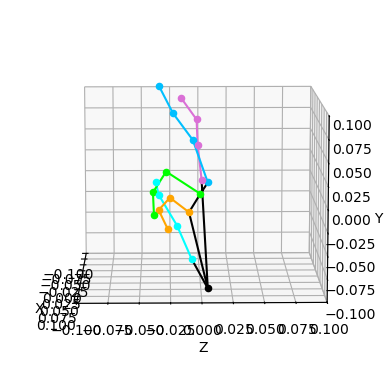

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=10, azim=255)
ax.set_xlim(-0.1, 0.1)
ax.set_ylim(-0.1, 0.1)
ax.set_zlim(-0.1, 0.1)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")

frames = 360
fps = 30


def update(frame):
	ax.view_init(elev=10 + np.sin(np.radians(360 / frames * frame * 2)) * 10, azim=360 / frames * frame)


colors = ["cyan", "orchid", "deepskyblue", "lime", "orange", "k", "k"]

lines = [np.array([landmarks[j : j + 3] for j in range(i, i + 12, 3)]) for i in range(3, 63, 12)]
lines.append(np.array([landmarks[0:3], landmarks[3:6]]))
lines.append(np.array([landmarks[0:3], *[landmarks[j : j + 3] for j in range(15, 63, 12)], landmarks[0:3]]))
for i in range(len(lines)):
	line = lines[i]
	ax.plot(line[:, 0], line[:, 2], -line[:, 1] * 1.25, color=colors[i])

for j in range(0, 63, 3):
	ax.scatter(
		landmarks[j],
		landmarks[j + 2],
		-landmarks[j + 1] * 1.25,
		color=colors[int((j / 3 - 1) // 4)] if j != 0 else "k",
	)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=1000 / fps)  # Rotate 360°
ani.save("hand.gif", writer="ffmpeg", fps=fps, progress_callback=(lambda i, n: print(f"Progress: {i}/{n}")))

plt.show()